In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.isalnum() and token not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]

    return stemmed_tokens


[nltk_data] Downloading package punkt to /Users/atul/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/atul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
raw_text = """
I love machine learning. It is awesome!
Deep learning and natural language processing are very cool.
Artificial intelligence is the future.
"""

preprocessed_tokens = preprocess_text(raw_text)
print(preprocessed_tokens)


['love', 'machin', 'learn', 'awesom', 'deep', 'learn', 'natur', 'languag', 'process', 'cool', 'artifici', 'intellig', 'futur']


In [9]:
# download the pre-trained model from kaggle or https://nlp.stanford.edu/projects/glove/
glove_embeddings = {}
with open("../models/glove.6B.50d.txt", "r") as file:
    for line in file:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype="float32")
        glove_embeddings[word] = vector


In [10]:
model = Word2Vec([preprocessed_tokens], min_count=1, vector_size=50, workers=4)

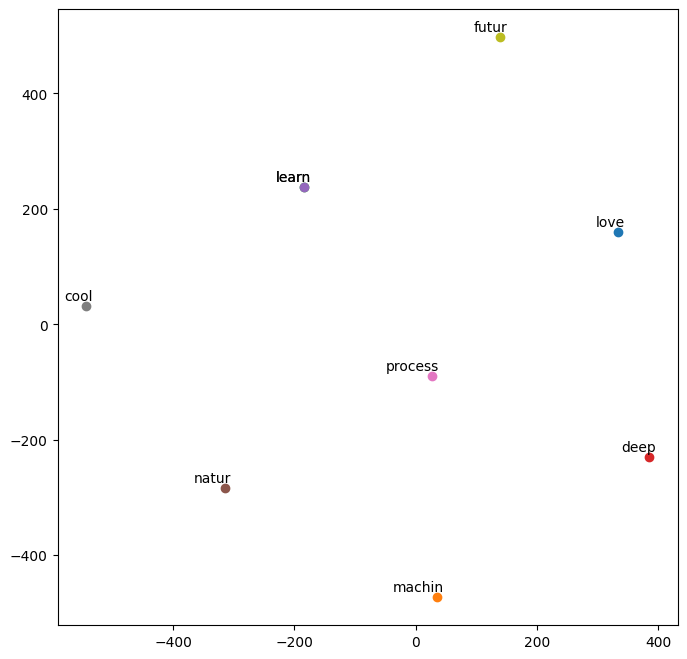

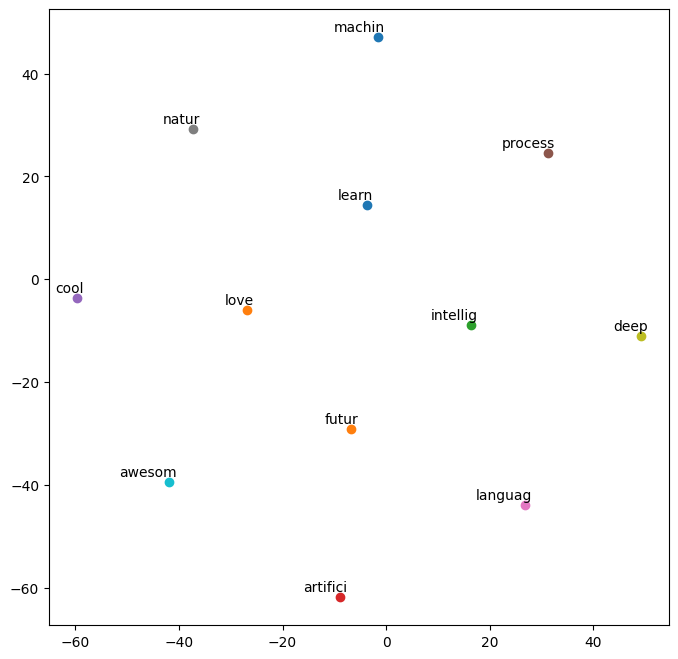

In [11]:
def visualize_embeddings(embeddings, words):
    tsne = TSNE(n_components=2, random_state=0, perplexity=len(words)-1)
    embedding_vectors = np.array([embeddings[word] for word in words])
    two_d_embeddings = tsne.fit_transform(embedding_vectors)

    plt.figure(figsize=(8, 8))
    for i, word in enumerate(words):
        x, y = two_d_embeddings[i, :]
        plt.scatter(x, y)
        plt.annotate(word, (x, y), xytext=(5, 2), textcoords="offset points", ha="right", va="bottom")
    plt.show()

# For GloVe
glove_words = [word for word in preprocessed_tokens if word in glove_embeddings]
visualize_embeddings(glove_embeddings, glove_words)

# For Word2Vec
word2vec_words = model.wv.index_to_key
visualize_embeddings(model.wv, word2vec_words)


['love', 'machin', 'learn', 'deep', 'learn', 'natur', 'process', 'cool', 'futur']
[('the', array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
       -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
        2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
        1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
       -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
       -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
        4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
        7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
       -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
        1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01],
      dtype=float32))]


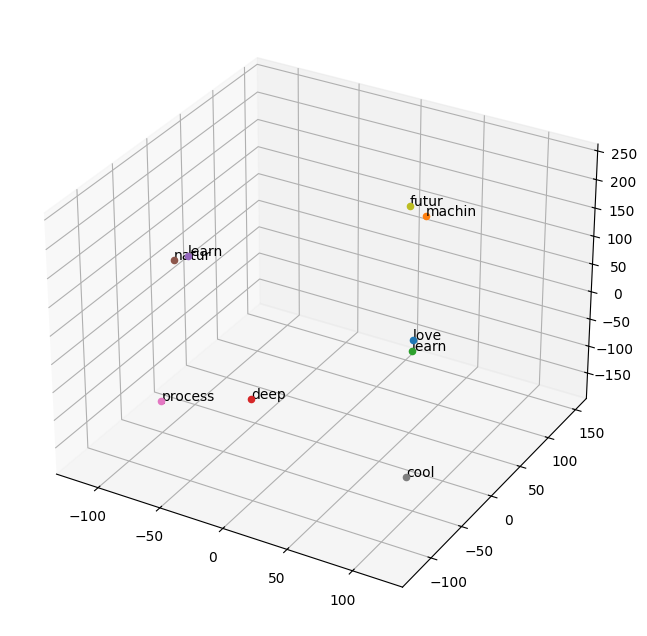

In [24]:
# generate 3d visualisation of vectors
def visualize_embeddings_3d(embeddings, words):
    tsne = TSNE(n_components=3, random_state=0, perplexity=len(words)-1)
    embedding_vectors = np.array([embeddings[word] for word in words])
    three_d_embeddings = tsne.fit_transform(embedding_vectors)

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    for i, word in enumerate(words):
        x, y, z = three_d_embeddings[i, :]
        ax.scatter(x, y, z)
        ax.text(x, y, z, word)
    plt.show()


# For GloVe
print(glove_words)
print(list(glove_embeddings.items())[:1])
visualize_embeddings_3d(glove_embeddings, glove_words)
